* Here you'll generate your own data to make sure you understand what PCA is doing

* Generate 4 variables W, X, Y, and Z

1. X and Y should not be correlated
  * They are independent

2. W and X should have a mild correlation ( < 0.5)

3. Y and Z should have a mild correlation ( > 0.9)

4. Generate a variable outcome as a linear combination of W, X, Y, and Z

In [1]:
install.packages("factoextra")

package 'factoextra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Aimee\AppData\Local\Temp\RtmpKOzGvi\downloaded_packages


In [5]:
install.packages("geometry")

also installing the dependencies 'magic', 'lpSolve', 'linprog', 'RcppProgress'



package 'magic' successfully unpacked and MD5 sums checked
package 'lpSolve' successfully unpacked and MD5 sums checked
package 'linprog' successfully unpacked and MD5 sums checked
package 'RcppProgress' successfully unpacked and MD5 sums checked
package 'geometry' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Aimee\AppData\Local\Temp\RtmpKOzGvi\downloaded_packages


In [6]:
library(ggplot2)
library(tidyverse)
library(geometry)
library(factoextra)

Warning message:
"package 'geometry' was built under R version 3.6.3"Warning message:
"package 'factoextra' was built under R version 3.6.3"Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


In [7]:
set.seed(44)
x = rnorm(30, 5, 2)
y = rnorm(30, 0, 2)
noise_w = rnorm(30, 0, 2)
noise_z = rnorm(30, 0, 0.2)
w = 0.4 * x + noise_w
z = 1.1 * y + noise_z
random_data = data.frame(x, y, z, w)
head(random_data)

x,y,z,w
6.307837,-0.1371094,0.08306619,4.5515975
5.038105,3.3014697,3.93943960,0.6458452
1.300992,2.8519130,2.98429957,-4.4923065
4.734473,-2.8677661,-3.12307306,3.4999475
2.602364,0.2515128,0.11629719,4.0028798
2.340517,1.3468802,1.45048515,-0.4530461


In [8]:
cor(random_data$x, random_data$y)
cor(random_data$y, random_data$z)
cor(random_data$x, random_data$w)

[1] -0.08547176

[1] 0.9973403

[1] 0.4513535

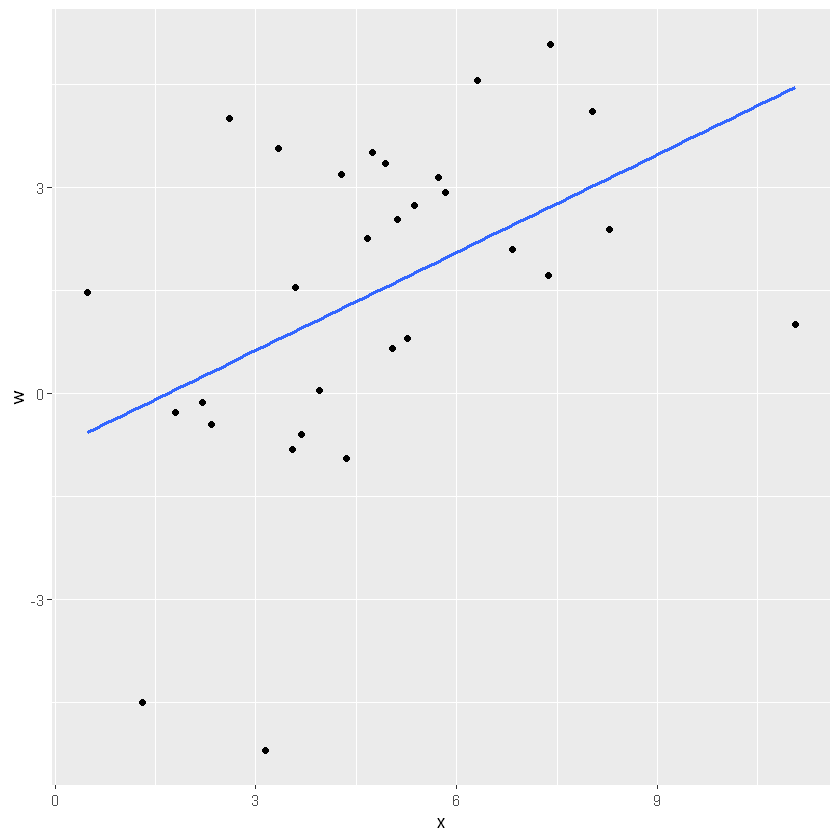

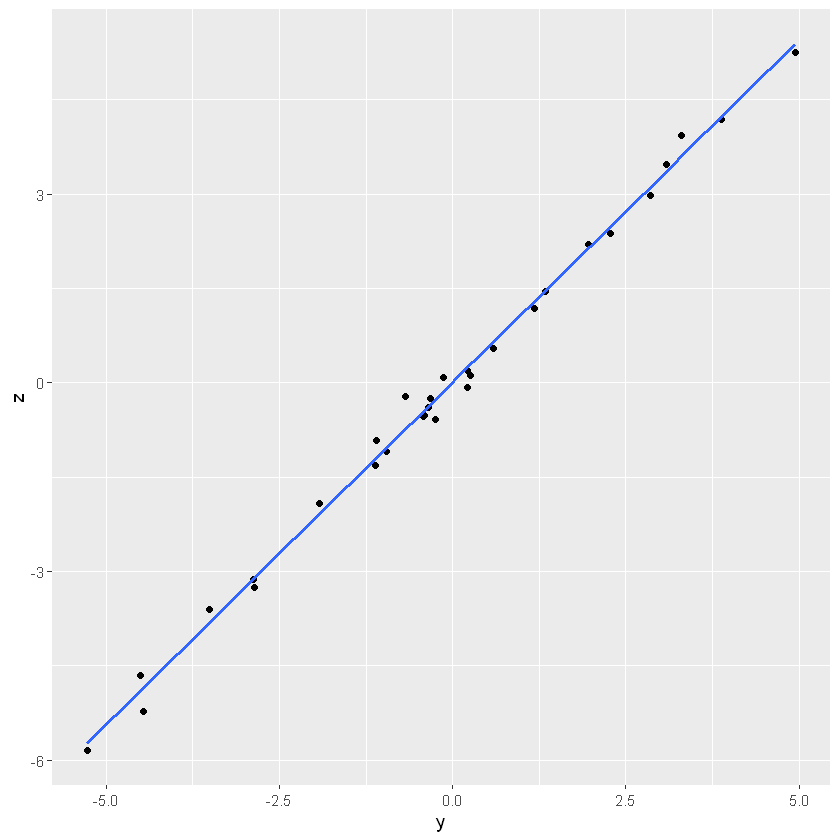

In [9]:
ggplot(random_data, aes(x=x, y=w))+
    geom_point()+
    geom_smooth(method = "lm", se = FALSE)

ggplot(random_data, aes(x=y, y=z))+
    geom_point()+
    geom_smooth(method = "lm", se = FALSE)

In [10]:
outcome = 1 + 1.1*w + 3*x + 1.4*y + 1*z

5. Model your outcome using W, X, Y, and Z.
  * Do your results match your model params?

In [11]:
cor(random_data$y, random_data$z)

[1] 0.9973403

In [12]:
random_model = lm(outcome ~ ., data = random_data)
summary(random_model)

#Unsure how/why the model is a perfect fit even with noise and variability within the data's components?

Warning message in summary.lm(random_model):
"essentially perfect fit: summary may be unreliable"


Call:
lm(formula = outcome ~ ., data = random_data)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.075e-14 -8.244e-16  7.899e-16  1.579e-15  3.485e-15 

Coefficients:
             Estimate Std. Error   t value Pr(>|t|)    
(Intercept) 1.000e+00  1.396e-15 7.162e+14   <2e-16 ***
x           3.000e+00  2.930e-16 1.024e+16   <2e-16 ***
y           1.400e+00  3.307e-15 4.234e+14   <2e-16 ***
z           1.000e+00  3.028e-15 3.302e+14   <2e-16 ***
w           1.100e+00  2.783e-16 3.953e+15   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.188e-15 on 25 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 7.409e+31 on 4 and 25 DF,  p-value: < 2.2e-16


6. Use PCA to reduce the dimensionality of your dataset
  * Can you explain why you don't need to include the outcome?     

In [13]:
res_pca = prcomp(random_data, scale=TRUE)
summary(res_pca)

Importance of components:
                          PC1    PC2    PC3     PC4
Standard deviation     1.4178 1.2021 0.7363 0.05019
Proportion of Variance 0.5026 0.3613 0.1355 0.00063
Cumulative Proportion  0.5026 0.8638 0.9994 1.00000

In [17]:
# Since the outcome is a combination offf all variables, it is unnecessary to include it in the PCA evaluation since all
# points will already using w, x, y, z. 

7. Use the bi-plot to visualize the contributions of your initial variables

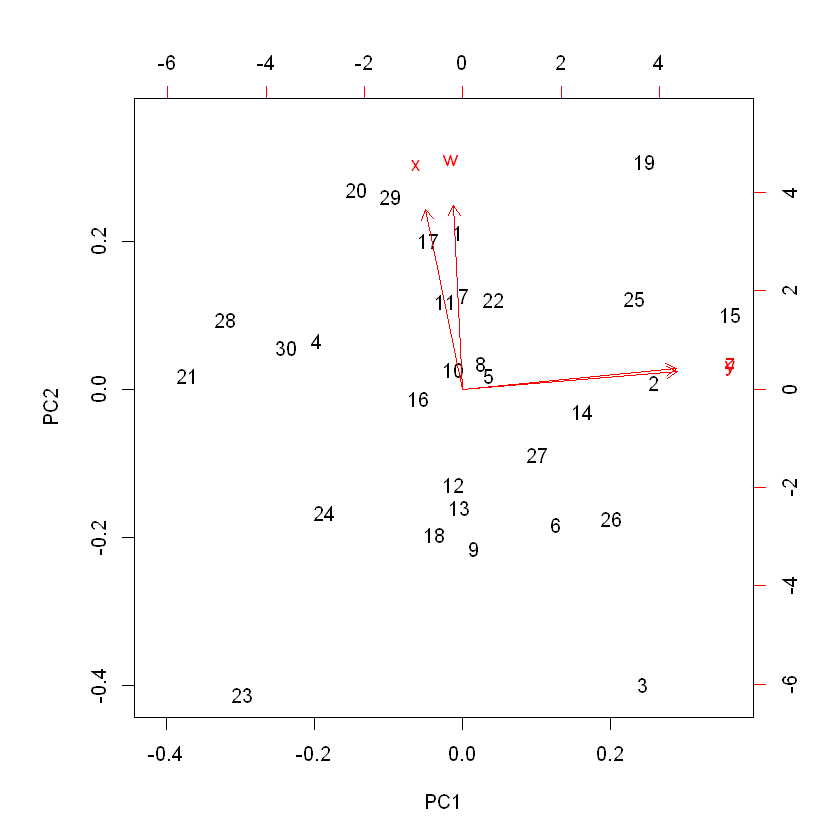

In [16]:
biplot(res_pca)

8. How efficient is the new lower-dimensional space representation at predicting the outcome?
  * Do your results match your model params?

In [ ]:
# this model seems to match the expectation of corelation between the z & y and x & w variables. 
# this model fits our expectations for the data and seems to match the model parameters.